# * Predicting the transaction is legal or fraud

## ** Import modules

In [2]:
from pandas import *
from numpy import *
import matplotlib.pyplot as plt

## ** Load and understand the data

In [3]:
# Loading data into work area

data=read_csv("D:/Datasets/creditcard.csv")

In [42]:
# Taking first 5 rows of the dataset

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
# checking how many rows consists of the data
data.index

RangeIndex(start=0, stop=284807, step=1)

In [44]:
# checking what are the columns in the data
data.columns

# By observing this all columns are in numerical form beacuse the credit card data want to be secure 
# so by using PCA it converts into numerical form

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [45]:
# with this we can observe the statistical measures of the data

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [46]:
# taking more information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##  ** Data preprocessing

In [47]:
# Checking each column contains how many null values

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [48]:
# Checking our data contains any double entries and deleting it

print("Duplicate rows is :" ,data.duplicated().sum())
print("Shape of the data before removing the duplicate rows",data.shape)
data.drop_duplicates(inplace=True)
print("Shape of the data after removing the duplicate rows",data.shape)

Duplicate rows is : 1081
Shape of the data before removing the duplicate rows (284807, 31)
Shape of the data after removing the duplicate rows (283726, 31)


## ** EDA

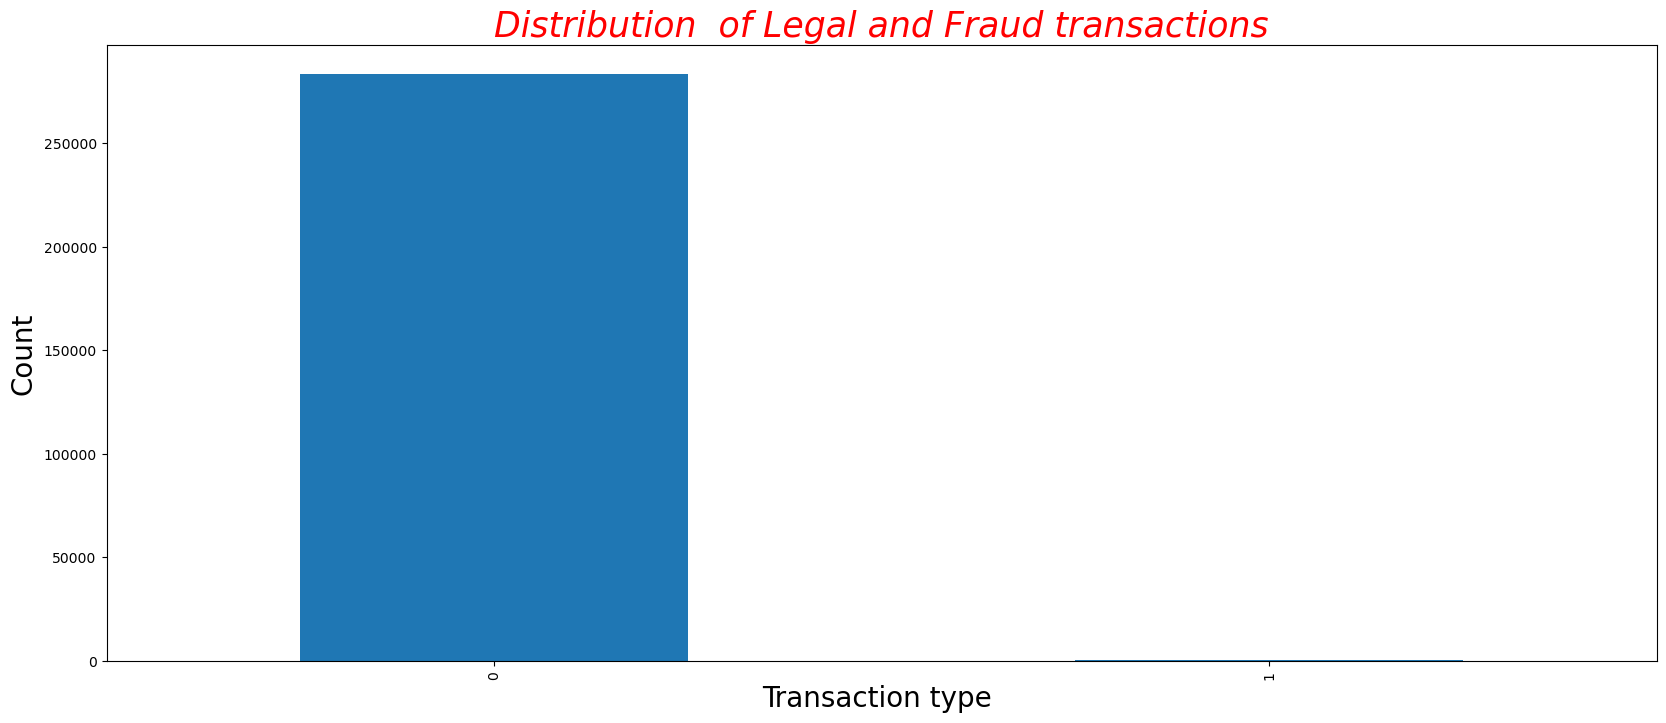

In [49]:
# In this graph we can observe the count of normal and fraud transactions

plt.figure(figsize=(20,8))
data.Class.value_counts().plot(kind='bar')
plt.title('Distribution  of Legal and Fraud transactions',fontsize=25,color='red',style='oblique')
plt.xlabel('Transaction type ',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

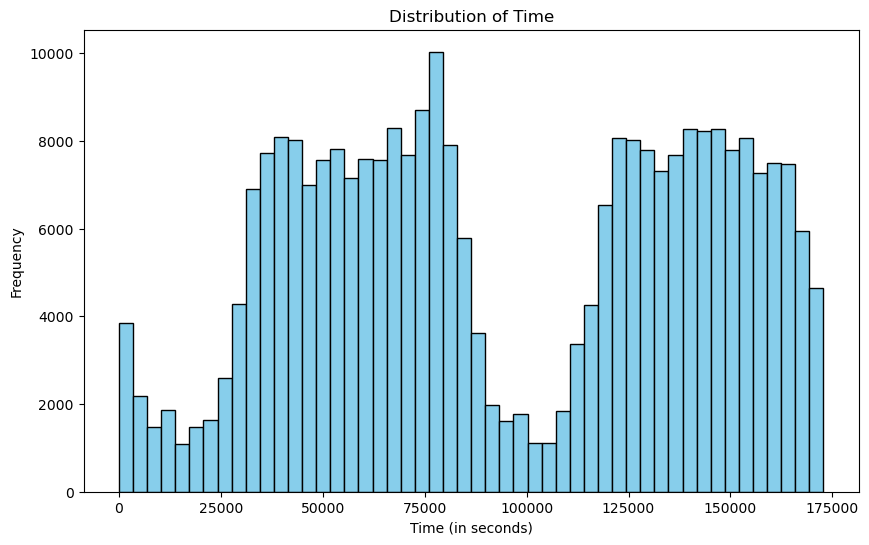

In [50]:
# Plot a histogram for the Time feature

plt.figure(figsize=(10, 6))
plt.hist(data['Time'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Time')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')
plt.show()

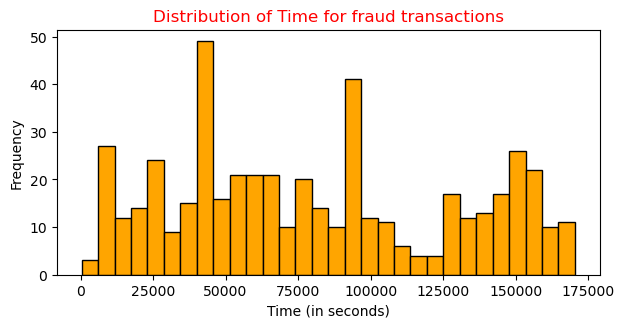

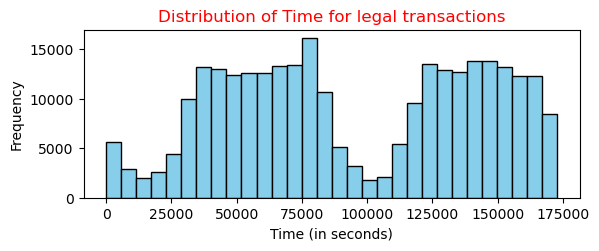

In [20]:
fraud=data[data['Class']==1]
legal=data[data['Class']==0]
# distribution of time for fraud transactions

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.hist(fraud['Time'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Time for fraud transactions',color='red')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')
plt.show()

#distribution of time for legal transactions
plt.subplot(2,1,2)
plt.hist(legal['Time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Time for legal transactions',color='red')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')
plt.show()

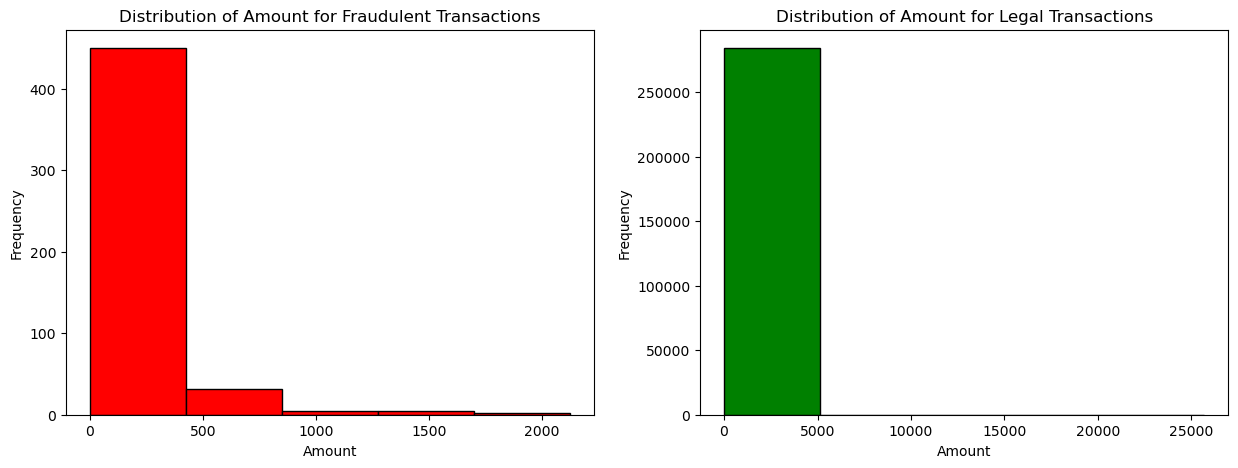

In [39]:
# Histogram of Amount for Fraudulent Transactions

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.hist(fraud['Amount'], bins=5, color='red', edgecolor='black')
plt.title('Distribution of Amount for Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Histogram of Amount for legal Transactions
plt.subplot(1,2,2)
plt.hist(legal['Amount'],bins=5,color='green',edgecolor='black')
plt.title('Distribution of Amount for Legal Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

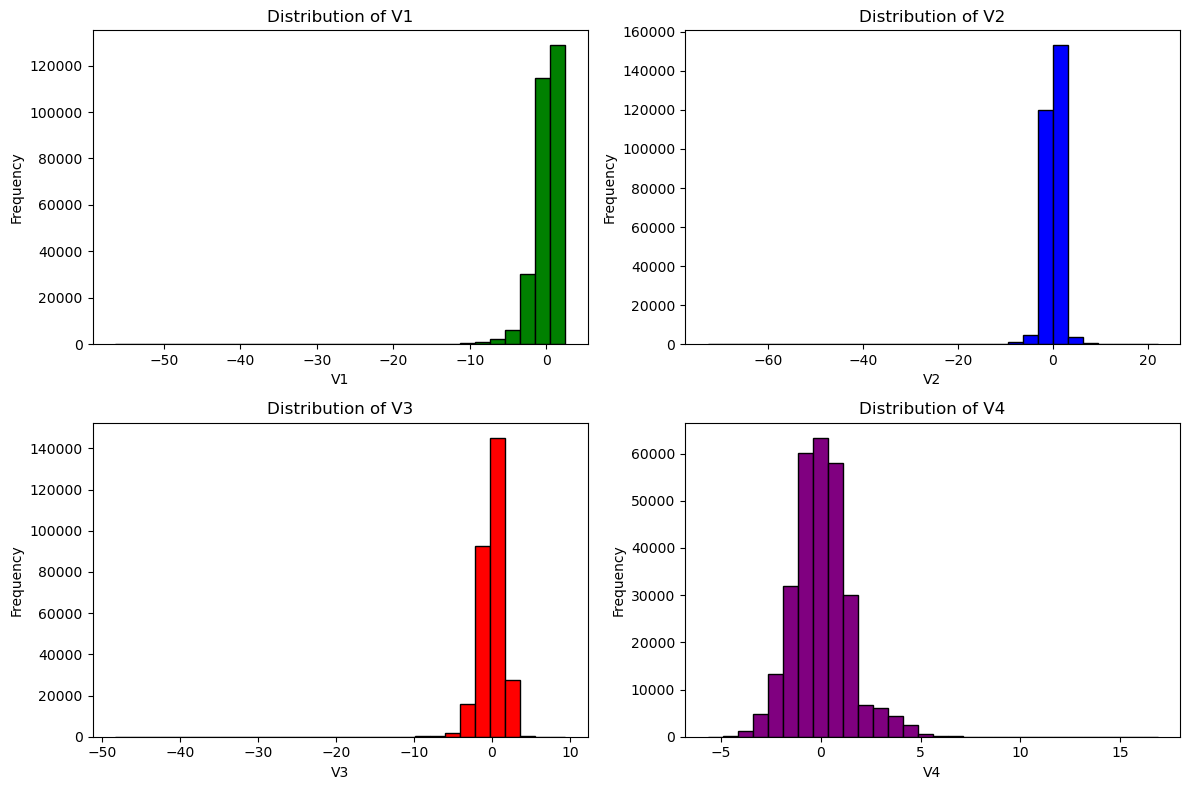

In [52]:
# Plot histograms for V1, V2, V3, and V4 for observe the distribution of data

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(data['V1'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of V1')
plt.xlabel('V1')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(data['V2'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of V2')
plt.xlabel('V2')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(data['V3'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of V3')
plt.xlabel('V3')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)
plt.hist(data['V4'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of V4')
plt.xlabel('V4')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## ** Feature Extraction

In [26]:
#The data is imbalanced because fraud transactions is very low when compared to the legal transactions

fraud=data[data['Class']==1]
print('size of the fraud transactions is ', fraud.shape)
legal=data[data['Class']==0]
print('size of the legal transactions is ',legal.shape)

size of the fraud transactions is  (492, 31)
size of the legal transactions is  (284315, 31)


In [27]:
print("Average amount spend on legal transactions",legal.Amount.mean())
print("Average amount of fraud transactions",fraud.Amount.mean())
# with this we can consider amount is main factor for the transactions deal with legal/fraud

Average amount spend on legal transactions 88.29102242225574
Average amount of fraud transactions 122.21132113821133


In [28]:
# Dividing the target feature(dependent variable) and the remaining features which have more impact 
# on target variable

x=data.drop('Class',axis=1)
y=data.iloc[:,30]
print('Independent variables',x.shape)
print('Target variable',y.shape)

Independent variables (284807, 30)
Target variable (284807,)


In [29]:
# Applying smote for balancing the data with equal no.of legal and fraud transactions
# for accurate predictions of model

print('The shape of data before applying smote is:',x.shape,y.shape)
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto',random_state=4)
x_resamp,y_resamp=smote.fit_resample(x,y)
print('The shape of resampling data is :',x_resamp.shape,y_resamp.shape)

The shape of data before applying smote is: (284807, 30) (284807,)
The shape of resampling data is : (568630, 30) (568630,)


In [30]:
# Standardise the data for easy and better understand for the model

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_stand_resamp=sc.fit_transform(x_resamp)
print('the standardise form of the first row :')
print(x_stand_resamp[0])

the standardise form of the first row :
[-1.8229337   0.20476856 -0.54671883  1.00409809 -0.30167338  0.31221601
  0.69322483  0.55520645 -0.0374788   0.76052349  0.67912974 -0.92048494
  0.57123008 -0.94594407  0.71657482  1.64544579  0.48608126  0.62593471
  0.50624391  0.04754955  0.06498519 -0.14630217  0.24696975 -0.10489138
  0.22410957  0.16611572 -0.48541828  0.05597145 -0.14856769  0.2464765 ]


In [31]:
# splitting the data for training and testing the model 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_stand_resamp,y_resamp,test_size=0.2,random_state=2)
print("shape of the training data is : ",x_train.shape,y_train.shape)
print("shape of the testing data is  : ",x_test.shape,y_test.shape)

shape of the training data is :  (454904, 30) (454904,)
shape of the testing data is  :  (113726, 30) (113726,)


## ** Applying Logistic Regression model 

In [32]:
class Logistic_Regression():
    
    # intialising the hyper parameters
    
    def __init__(self,Learning_rate,No_of_iterations):
        self.Learning_rate=Learning_rate
        self.No_of_iterations=No_of_iterations
        
    #  fit the data and intialise model parameters
    
    def fit(self,x,y):
        self.m,self.n=x.shape
        self.w=zeros(self.n)
        self.b=0
        self.x=x
        self.y=y
    
    # Implement Gradient Descent and update model parameters
    
        for i in range(self.No_of_iterations):
            self.update_weights()
    def update_weights(self):
        
        # y_hat formula sigmoid function
        y_hat=1/(1+exp(-( self.x.dot(self.w) + self.b )))
         
        # derivations
        dw=((1/self.m)*dot(self.x.T,(y_hat-self.y)))
        db=(1/self.m)*sum(y_hat-self.y)
        
        # updating weights and bias using gradient descent
        self.w=self.w-self.Learning_rate*dw
        self.b=self.b-self.Learning_rate*db
            
    def predict(self,x):
        
        y_pred= 1/(1+exp(- (x.dot(self.w)+ self.b)))
        y_pred=where (y_pred>0.5,1,0)
        return y_pred
        
        

In [33]:
# Loading the Logistic regression model
LG_model=Logistic_Regression(0.01,1000)
LG_model

In [34]:
# training the model with training data
LG_model.fit(x_train,y_train)

In [35]:
# Now checking the accuracy score of the training data

from sklearn.metrics import accuracy_score
print("Training accuracy score is ",accuracy_score(LG_model.predict(x_train),y_train))

# Now check the accuracy with test data
print("Testing accuracy score is ",accuracy_score(LG_model.predict(x_test),y_test))

Training accuracy score is  0.9250699048590472
Testing accuracy score is  0.9249687846226896


## * Applying Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

model1=DecisionTreeClassifier(criterion='gini')
model1.fit(x_train,y_train)

print('Accuracy score of DecisionTree with train data',accuracy_score(model.predict(x_train),y_train))
print('Accuracy score of DecisionTree with test data',accuracy_score(model.predict(x_test),y_test))

Accuracy score of DecisionTree with train data 0.9238576888112197
Accuracy score of DecisionTree with test data 0.9254646872958995


## * Applying Random Forest Classifier 

In [39]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 

# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(x_train, y_train) 
# predictions 

print('Accuracy score of RandomForest classifier with train data',accuracy_score(rfc.predict(x_train),y_train))
print('Accuracy score of RandomForestClassifier with test data',accuracy_score(rfc.predict(x_test),y_test))

Accuracy score of RandomForest classifier with train data 1.0
Accuracy score of RandomForestClassifier with test data 0.9998852623960742
